Very first Neural Network model using Tensorflow! We are going to learn how to model a simple line y = m x + b and use it to predict the values of y given x values.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import sys
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
print("Python version " + sys.version)
print("Tensorflow version " + tf.VERSION)
print("Pandas version " + pd.__version__)
print("numpy version " + np.__version__)

Python version 3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
Tensorflow version 1.12.0
Pandas version 0.20.3
numpy version 1.15.4


# Create Training Data

    y = m * x + b 

We are going to call our x variable, train_x

We are going to call our y variable, train_y

In [5]:
# let's generate 100 random samples
train_x = np.random.rand(100).astype(np.float32)

In [6]:
# let's compute train_y using 0.1 for m and 0.3 for b
train_y = 0.1 * train_x + 0.3

Let us pause for a second....

What have you done thus far? You have simply created your training data that you are going to use to train your model. You will shortly be feeding in train_x to your model and ask it to predict what train_y should be. Your model needs to figure out what the values for m and b need to be in order be correct in its prediction. You already know the answer (m=0.1, b=0.3) but your job is to train your model to come up with the correct answer.

    Plot the Data so you know what you are working with

In [7]:
df = pd.DataFrame({'x':train_x,
                   'y':train_y})
df.head()

,x,y
0,0.459031,0.345903
1,0.981603,0.398160
2,0.058083,0.305808
3,0.821287,0.382129
4,0.256323,0.325632


In [8]:
df.describe()

,x,y
count,100.000000,100.000000
mean,0.473251,0.347325
std,0.295644,0.029564
min,0.007812,0.300781
25%,0.228594,0.322859
50%,0.468565,0.346857
75%,0.675298,0.367530
max,0.997661,0.399766


This is not a very exciting chart, but you can clearly see this is just a straight line. We could have added some noise to the data but I am trying to make this lesson as simple as possible.

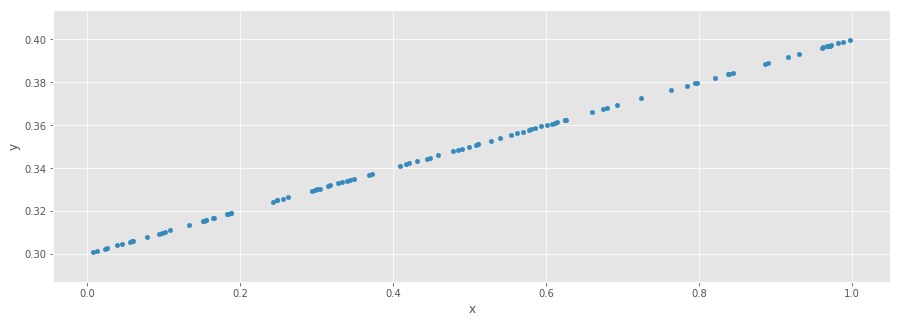

In [9]:
df.plot.scatter(x='x', y='y', figsize=(15,5))

## Create Test Data

This is the data that you are going to use to verify that your model actually works. The test data should be data that your model has not seen before. In other words your training data should be different than your test data.

In [10]:
# this is the data we are going to use to make sure our model is generating good predictions
test_x = np.random.rand(100).astype(np.float32)

## Model your Graph 

    IMPORTANT functions/parameters to play with

Loss - There are various functions you can choose to measure the error between train_y (your training data) and pred (your models predicted value)

GradientDescentOptimizer(LEARNING_RATE) - Modify this number to see how your results change

### Variables

In the previous lessons, you have just defined constants and placeholders. In this lesson you are introducing Variables to the mix.

When your model runs it will initialize your variables W and b. On every training iteration it will adjust the values for variables W and b. For this to occur, you need to define W and b as variables.

Constants - Values created before you run our model that do not change.

Placeholders - Values that are fed into your model at run time.

Variables - Values that are modified at run time by your model.

W - Weights for your output layer.

b - Biases for your output layer.


In [13]:
#Placeholders
x = tf.placeholder(tf.float32,name="01_x")
y = tf.placeholder(tf.float32,name="01_y")


#variables
W = tf.Variable(np.random.rand())
b = tf.Variable(np.random.rand())
pred = tf.multiply(W,x) + b


# minimize the mean squared errors
# as mentioned above there are other ways to measure the error between train_y and pred
loss = tf.reduce_mean(tf.square(pred - y))


# we pick our optimizer and a learning rate
optimizer = tf.train.GradientDescentOptimizer(0.7)

# we train our model by minimizing our loss function
train = optimizer.minimize(loss)

## Time to Train!

When working with Variables you must initialize them with some default values, tf.global_variables_initializer() does that for you.

In [15]:
# initialize the variables
init = tf.global_variables_initializer()


#run your graph

with tf.Session() as sess:
    sess.run(init)
    
    #fit the function
    for step in range(200):
        #get data
        train_data = {x: train_x,y : train_y}
        
        #traning in progress
        sess.run(train,feed_dict=train_data)
        
        #print the last 20 result
        if step > 180:
            print(step, sess.run(W),sess.run(b))
            
    # note that W and b mach the line we are tying to model (y = 0.1x + 0.3)
    print("Training completed:", "W=", sess.run(W), "b=", sess.run(b))
    
    # run your trained model on the test data set
    test_results = sess.run(pred, feed_dict={x: test_x})
    
    # capture the predicted results so you can plot them
    df_final = pd.DataFrame({'test_x':test_x,
                             'pred':test_results})

181 0.10000005 0.29999998
182 0.10000005 0.29999998
183 0.10000005 0.29999998
184 0.10000005 0.29999998
185 0.10000005 0.29999998
186 0.10000005 0.29999998
187 0.10000005 0.29999998
188 0.10000005 0.29999998
189 0.10000005 0.29999998
190 0.10000005 0.29999998
191 0.10000005 0.29999998
192 0.10000005 0.29999998
193 0.10000005 0.29999998
194 0.10000005 0.29999998
195 0.10000005 0.29999998
196 0.10000005 0.29999998
197 0.10000005 0.29999998
198 0.10000005 0.29999998
199 0.10000005 0.29999998
Training completed: W= 0.10000005 b= 0.29999998


## Plot the Training Data vs the Test Data

As you can see, your NN model is doing very well. You were able to get a line that matches perfectly using data that was not part of the training data set.

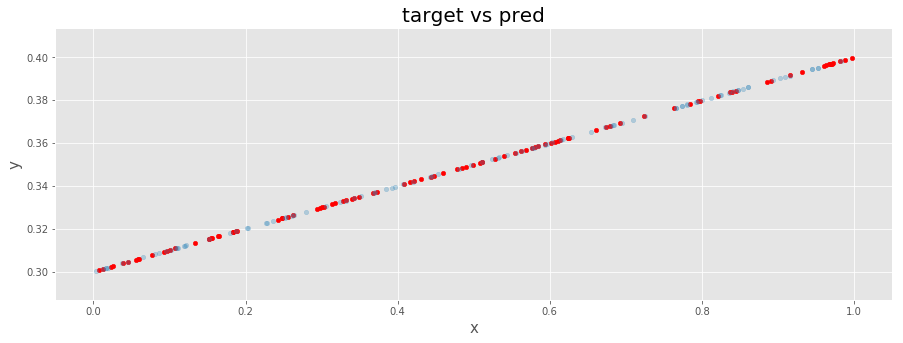

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Chart 1 - Shows the line we are trying to model
df.plot.scatter(x='x', y='y', ax=axes, color='red')

# Chart 2 - Shows the line our trained model came up with
df_final.plot.scatter(x='test_x', y='pred', ax=axes, alpha=0.3)

# add a little sugar
axes.set_title('target vs pred', fontsize=20)
axes.set_ylabel('y', fontsize=15)
axes.set_xlabel('x', fontsize=15);